# Simulation of Vessel Trajectories & Anomalies

Use the config file to adjust the number of vessels, obstacles, speed limits, ...

In [1]:
import logging
from datetime import datetime, timedelta
import json

from model import ShipModel
from agents.ship import Ship

logging.basicConfig(
    filename="notebook_logs.log",
    filemode="w",  # Overwrites on each run; use "a" to append
    level=logging.INFO,
    format="%(asctime)s - %(levelname)s - %(message)s"
)

config_file="config/config.json"
with open(config_file) as f:
    config = json.load(f)

steps = config["simulation_steps"]
    
model = ShipModel(
        width=config["width"],
        height=config["height"],
        num_ships=config["num_ships"],
        max_speed_range=config["max_speed_range"],
        speed_variation=config["speed_variation"],
        directional_variation=config["directional_variation"],
        ports=config["ports"],
        speed_limit_zones=config.get("speed_limit_zones", []),
        obstacles=config["obstacles"],
        dwa_config=config["dwa_config"],
        resolution=config["resolution"],
        obstacle_threshold=config["obstacle_threshold"],
        lookahead=config["lookahead"]
    )

for type, agents in model.agents_by_type.items():
    print(f'{type}: {len(agents)}')

for ship in model.agents.select(agent_type=Ship):
    print(f"Ship {ship.unique_id} has a maximum speed of {ship.original_max_speed}.")

<class 'agents.obstacle.Obstacle'>: 8
<class 'agents.port.Port'>: 10
<class 'agents.ship.Ship'>: 35
Ship 0 has a maximum speed of 1.3968675124699903.
Ship 1 has a maximum speed of 1.446300547207205.
Ship 2 has a maximum speed of 1.2429553945792748.
Ship 3 has a maximum speed of 1.1981118767845358.
Ship 4 has a maximum speed of 1.2475188105330757.
Ship 5 has a maximum speed of 1.4780299423525822.
Ship 6 has a maximum speed of 1.2221496411088746.
Ship 7 has a maximum speed of 1.2062981808169277.
Ship 8 has a maximum speed of 1.361675570180919.
Ship 9 has a maximum speed of 1.1934564678764974.
Ship 10 has a maximum speed of 1.1388938976420437.
Ship 11 has a maximum speed of 1.2076210339454647.
Ship 12 has a maximum speed of 1.2532441828985077.
Ship 13 has a maximum speed of 1.198327200079067.
Ship 14 has a maximum speed of 1.3184823228988503.
Ship 15 has a maximum speed of 1.4034745423596284.
Ship 16 has a maximum speed of 1.346163574115423.
Ship 17 has a maximum speed of 1.49670078605009

## Trajectory Simulation

In [2]:
t0 = datetime.now()
print(f"{datetime.now()} Starting ...")
for t in range(steps):
    stride = 50
    if t%stride == 0:
        print(f"Steps {t} - {t+stride-1}...")
    model.step()
t1 = datetime.now()
print(f"{datetime.now()} Finished in {t1-t0}.")

2025-06-10 22:32:50.093854 Starting ...
Steps 0 - 49...
Steps 50 - 99...
Steps 100 - 149...
Steps 150 - 199...
Steps 200 - 249...
Steps 250 - 299...
Steps 300 - 349...
Steps 350 - 399...
Steps 400 - 449...
Steps 450 - 499...
Steps 500 - 549...
Steps 550 - 599...
Steps 600 - 649...
Steps 650 - 699...
Steps 700 - 749...
Steps 750 - 799...
Steps 800 - 849...
Steps 850 - 899...
Steps 900 - 949...
Steps 950 - 999...
Steps 1000 - 1049...
Steps 1050 - 1099...
Steps 1100 - 1149...
Steps 1150 - 1199...
Steps 1200 - 1249...
Steps 1250 - 1299...
Steps 1300 - 1349...
Steps 1350 - 1399...
Steps 1400 - 1449...
Steps 1450 - 1499...
Steps 1500 - 1549...
Steps 1550 - 1599...
Steps 1600 - 1649...
Steps 1650 - 1699...
Steps 1700 - 1749...
Steps 1750 - 1799...
Steps 1800 - 1849...
Steps 1850 - 1899...
Steps 1900 - 1949...
Steps 1950 - 1999...
Steps 2000 - 2049...
Steps 2050 - 2099...
Steps 2100 - 2149...
Steps 2150 - 2199...
Steps 2200 - 2249...
Steps 2250 - 2299...
Steps 2300 - 2349...
Steps 2350 - 2399.

In [3]:
agent_df = model.datacollector.get_agent_vars_dataframe().dropna()
df = agent_df.reset_index()
df

,Step,AgentID,x,y,AStarPath
0,0,0,16.0,58.0,"[(16, 58), (17, 58), (18, 58), (19, 58), (20, ..."
1,0,1,15.0,45.0,"[(15, 45), (16, 44), (17, 44), (18, 44), (19, ..."
2,0,2,70.0,60.0,"[(70, 60), (70, 59), (70, 58), (70, 57), (71, ..."
3,0,3,70.0,60.0,"[(70, 60), (69, 60), (68, 60), (67, 60), (66, ..."
4,0,4,70.0,60.0,"[(70, 60), (70, 59), (70, 58), (70, 57), (71, ..."
...,...,...,...,...,...
105030,3000,25,70.0,60.0,"[(55, 85), (56, 84), (57, 83), (58, 82), (59, ..."
105031,3000,15,45.0,20.0,"[(20, 80), (20, 79), (20, 78), (20, 77), (20, ..."
105032,3000,21,70.0,60.0,"[(16, 58), (17, 58), (18, 58), (19, 58), (20, ..."
105033,3000,2,90.0,10.0,"[(70, 60), (70, 59), (70, 58), (70, 57), (71, ..."


Saved simulation plot to simulation_plot.png


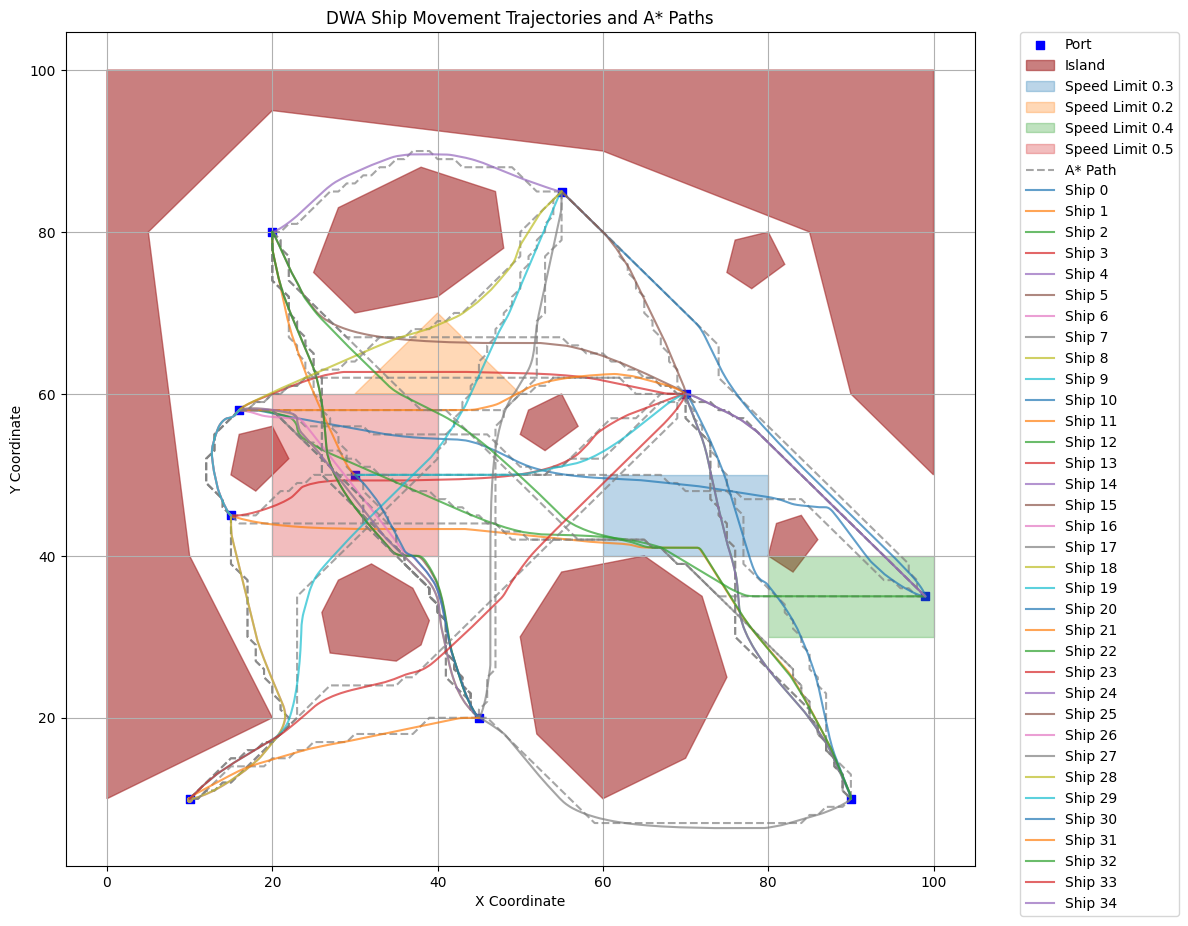

In [4]:
from visualization import plot_simulation

# Run visualization
plot_simulation(df, config)

In [5]:
import movingpandas as mpd

start_datetime = datetime.now()
df = df.drop('AStarPath', axis=1)
df["t"] = df["Step"].apply(lambda step: start_datetime + timedelta(seconds=step))
tc = mpd.TrajectoryCollection(df, traj_id_col='AgentID', t='t', x='x', y='y', crs=31287)

d:\projects\mobispaces\synth-data-generator\ships_hybrid_algorithm\ship-venv\Lib\site-packages\movingpandas\__init__.py:41: UserWarning: Missing optional dependencies. To use the trajectory smoother classes please install Stone Soup (see https://stonesoup.readthedocs.io/en/latest/#installation).
  warnings.warn(e.msg, UserWarning)


In [6]:
#tc = mpd.TrajectoryCollection(df, traj_id_col='AgentID', t='t', x='x', y='y', crs=31287)
tc

TrajectoryCollection with 35 trajectories

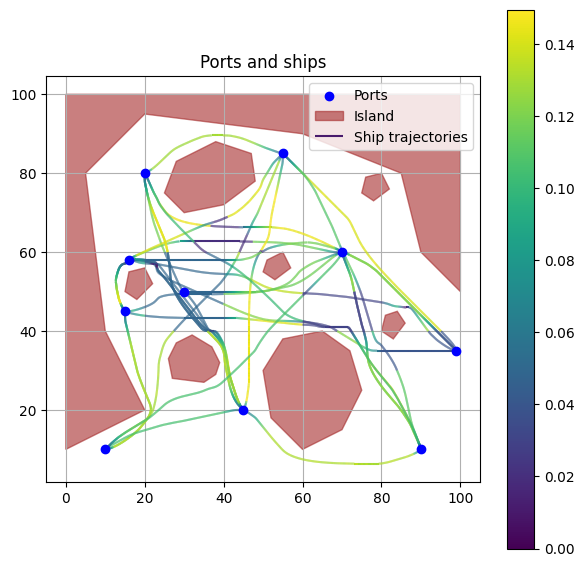

In [7]:
import matplotlib.pyplot as plt
from shapely.geometry import Polygon

fig, ax = plt.subplots(figsize=(7,7))

x_coords, y_coords = zip(*config["ports"])
ax.scatter(x_coords, y_coords, color='blue', label='Ports', zorder=5)

for island in config["obstacles"]:
    island_shape = Polygon(island)
    x, y = island_shape.exterior.xy
    ax.fill(x, y, color="brown", alpha=0.6, label="Island" if 'Island' not in plt.gca().get_legend_handles_labels()[1] else "")

tc.plot(ax=ax, label='Ship trajectories', column='speed', legend=True)
ax.grid(True)

# Labels and legend
ax.legend()
ax.set_title("Ports and ships")

plt.show()

In [8]:
try:
    tc.trajectories[0].hvplot()
except:
    pass

In [9]:
import os

tc.add_speed(overwrite=True, n_threads=os.cpu_count())
tc.trajectories[0].df#.hvplot(c='speed')

,Step,AgentID,geometry,speed
t,,,,
2025-06-10 22:37:47.135199,0,0,POINT (16 58),0.010
2025-06-10 22:37:48.135199,1,0,POINT (16.01 58),0.010
2025-06-10 22:37:49.135199,2,0,POINT (16.021 58),0.011
2025-06-10 22:37:50.135199,3,0,POINT (16.033 58),0.012
2025-06-10 22:37:51.135199,4,0,POINT (16.046 58),0.013
...,...,...,...,...
2025-06-10 23:27:43.135199,2996,0,POINT (99 35),0.000
2025-06-10 23:27:44.135199,2997,0,POINT (99 35),0.000
2025-06-10 23:27:45.135199,2998,0,POINT (99 35),0.000


In [10]:
sim_result = tc.to_point_gdf()
sim_result['x'] = sim_result.geometry.x
sim_result['y'] = sim_result.geometry.y
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
sim_out_file_name = f'sim_{timestamp}.csv'
sim_result.to_csv(sim_out_file_name)
print(f'Saved simulation results to {sim_out_file_name}')
sim_result#[sim_result['speed'] > 0.6]

Saved simulation results to sim_20250610_223819.csv


,Step,AgentID,geometry,speed,x,y
t,,,,,,
2025-06-10 22:37:47.135199,0,0,POINT (16 58),0.010,16.000,58.0
2025-06-10 22:37:48.135199,1,0,POINT (16.01 58),0.010,16.010,58.0
2025-06-10 22:37:49.135199,2,0,POINT (16.021 58),0.011,16.021,58.0
2025-06-10 22:37:50.135199,3,0,POINT (16.033 58),0.012,16.033,58.0
2025-06-10 22:37:51.135199,4,0,POINT (16.046 58),0.013,16.046,58.0
...,...,...,...,...,...,...
2025-06-10 23:27:43.135199,2996,34,POINT (70 60),0.000,70.000,60.0
2025-06-10 23:27:44.135199,2997,34,POINT (70 60),0.000,70.000,60.0
2025-06-10 23:27:45.135199,2998,34,POINT (70 60),0.000,70.000,60.0


## Anomaly Simulation

In [11]:
import numpy as np
import pandas as pd
import movingpandas as mpd
from datetime import datetime, timedelta

In [12]:
sim_out_file_name = 'sim_20250610_125111.csv'
PERCENTAGE_OF_ANOMALIES = 0.03

In [13]:
sims = pd.read_csv(sim_out_file_name)
sims

FileNotFoundError: [Errno 2] No such file or directory: 'sim_20250610_125111.csv'

In [ ]:
#sims = sims[sims.AgentID<29].copy()
sims['is_anomaly'] = False
sims['anomaly_type'] = 'n/a'


In [ ]:
tc = mpd.TrajectoryCollection(sims, t='t', traj_id_col='AgentID', x='x', y='y', crs=31287)
tc

ValueError: Assigning CRS to a GeoDataFrame without a geometry column is not supported. Supply geometry using the 'geometry=' keyword argument, or by providing a DataFrame with column name 'geometry'

In [ ]:
# Remove stopped segments (with speed < 0.0001)
tc = mpd.SpeedSplitter(tc).split(speed=0.0001, duration=timedelta(seconds=5))
tc

### Speed

Change the timestamps to make a subsection of the trajectory faster

In [ ]:
unique_ids = sims.AgentID.unique()
unique_ids

In [ ]:
sample_ids_pd = pd.Series(unique_ids).sample(frac=PERCENTAGE_OF_ANOMALIES).tolist()
print("Subset we'll insert anomalies in: ", sample_ids_pd)

In [ ]:
def inject_speed_anomaly(traj, duration_pct=(0.1,0.2), speedup_pct=(1.5,2.5)):
    df = traj.df.copy()
    df.reset_index(inplace=True)
    df["t_diff"] = df['t'].diff()
    # Choose within middle range
    total_steps = len(df)
    anomaly_start_idx = np.random.randint(0.1 * total_steps, 0.8 * total_steps)  
    duration_pct = duration_pct[0] + (np.random.random() * (duration_pct[1]-duration_pct[0]))
    anomaly_duration = int(duration_pct * total_steps)  
    # Insert new values
    speedup_pct = speedup_pct[0] + (np.random.random() * (speedup_pct[1]-speedup_pct[0]))
    new_vals = df.iloc[anomaly_start_idx : anomaly_start_idx + anomaly_duration].t_diff / speedup_pct
    df.loc[anomaly_start_idx : anomaly_start_idx + anomaly_duration -1, "t_diff"] = new_vals
    # Flag anomalies
    df.loc[anomaly_start_idx : anomaly_start_idx + anomaly_duration -1, "is_anomaly"] = True
    df.loc[anomaly_start_idx : anomaly_start_idx + anomaly_duration -1, "anomaly_type"] = 'speed'

    # Correct the timestamp update logic
    df["t"] = df["t"].iloc[0] + df["t_diff"].fillna(pd.Timedelta(seconds=0)).cumsum()
    return mpd.Trajectory(df,t='t',traj_id=traj.id)

In [ ]:
for i, traj in enumerate(tc.trajectories):
    if i in sample_ids_pd: 
        traj = inject_speed_anomaly(traj)
        tc.trajectories[i] = traj
    
tc.add_speed(overwrite=True)
tc.plot(column='speed', legend=True)

In [ ]:
ax = tc.plot(column='is_anomaly', cmap='Accent')

In [ ]:
try:
    tc.trajectories[0].hvplot(c='speed')
except:
    pass

In [ ]:
sim_result = tc.to_point_gdf()
sim_result['x'] = sim_result.geometry.x
sim_result['y'] = sim_result.geometry.y
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
sim_out_file_name = f'anomalies_speed_{timestamp}.csv'
sim_result.to_csv(sim_out_file_name)
print(f'Saved simulated speed anomalies to {sim_out_file_name}')

### Location

#### Generate trajectories that pass through obstacles

Note that is not guaranteed that each resulting trajectory will pass through an obtacle! Ships simply ignore the obstacles.

In [ ]:
import logging
from datetime import datetime, timedelta
import json

from model import ShipModel
from agents.ship import Ship

logging.basicConfig(
    filename="notebook_logs.log",
    filemode="w",  # Overwrites on each run; use "a" to append
    level=logging.INFO,
    format="%(asctime)s - %(levelname)s - %(message)s"
)

config_file="config/config.json"
with open(config_file) as f:
    config = json.load(f)

steps = config["simulation_steps"]
    
model = ShipModel(
        width=config["width"],
        height=config["height"],
        num_ships=int(config["num_ships"]*2*PERCENTAGE_OF_ANOMALIES), # doubling the number, assuming that 50% will violate obstacles
        max_speed_range=config["max_speed_range"],
        ports=config["ports"],
        speed_limit_zones=config.get("speed_limit_zones", []),
        obstacles=[config["obstacles"][0]], # Here we only select the first obstacle that describes the main land mass
        dwa_config=config["dwa_config"],
        resolution=config["resolution"],
        obstacle_threshold=config["obstacle_threshold"],
        lookahead=config["lookahead"]
    )

In [ ]:
print(f"{datetime.now()} Starting ...")
for t in range(steps):
    stride = 50
    if t%stride == 0:
        print(f"Steps {t} - {t+stride-1}...")
    model.step()
print(f"{datetime.now()} Finished.")

In [ ]:
agent_df = model.datacollector.get_agent_vars_dataframe().dropna()
df = agent_df.reset_index()
df

In [ ]:
from visualization import plot_simulation
plot_simulation(df, config)

In [ ]:
import movingpandas as mpd

start_datetime = datetime.now()
df = df.drop('AStarPath', axis=1)
df["t"] = df["Step"].apply(lambda step: start_datetime + timedelta(seconds=step))
tc = mpd.TrajectoryCollection(df, traj_id_col='AgentID', t='t', x='x', y='y', crs=31287)

In [ ]:
tc.add_speed(overwrite=True)
tc.trajectories[0].df

In [ ]:
sim_result = tc.to_point_gdf()
sim_result['x'] = sim_result.geometry.x
sim_result['y'] = sim_result.geometry.y
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
sim_out_file_name = f'sim_no-obstacles_{timestamp}.csv'
sim_result.to_csv(sim_out_file_name)
print(f'Saved simulation results to {sim_out_file_name}')

#### Flag anomalies

In [ ]:
sims = pd.read_csv(sim_out_file_name)
sims

In [ ]:
#sims = sims[sims.AgentID<22].copy()
sims['is_anomaly'] = False
sims['anomaly_type'] = 'n/a'
tc = mpd.TrajectoryCollection(sims, t='t', traj_id_col='AgentID', x='x', y='y', crs=31287)
tc

In [ ]:
tc.plot()

In [ ]:
from shapely.geometry import Polygon
from geopandas import GeoSeries

def inject_location_anomaly(traj, polygon):
    df = traj.df.copy()
    intersecting = df.intersects(polygon)
    df.loc[intersecting, 'is_anomaly'] = True
    df.loc[intersecting, 'anomaly_type'] = 'location'
    return mpd.Trajectory(df,t='t',traj_id=traj.id)

In [ ]:

obstacles=config["obstacles"]
polygons=[]

for obstacle in obstacles:
    polygon = Polygon(obstacle)
    polygons.append(polygon)
    for i, traj in enumerate(tc.trajectories):
        traj = inject_location_anomaly(traj, polygon)
        tc.trajectories[i] = traj
    

In [ ]:
ax = tc.plot(column='is_anomaly', cmap='Accent')
GeoSeries(polygons).plot(ax=ax, color="lightgray")

In [ ]:
sim_result = tc.to_point_gdf()
sim_result['x'] = sim_result.geometry.x
sim_result['y'] = sim_result.geometry.y
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
sim_out_file_name = f'anomalies_loc_{timestamp}.csv'
sim_result.to_csv(sim_out_file_name)
print(f'Saved simulated location anomalies to {sim_out_file_name}')

### Direction

TODO

## Merge files

In [ ]:
df1 = pd.read_csv("anomalies_speed_20250517_172830.csv")
df2 = pd.read_csv("anomalies_loc_20250517_184842.csv")
out = pd.concat([df1,df2])[['t','AgentID','speed','is_anomaly','anomaly_type','x','y']]
out.to_csv("synthetic_vessel_tracks_with_anomalies_20250517.csv", index=False)

In [ ]:
tmp = pd.read_csv("synthetic_vessel_tracks_with_anomalies_20250517.csv")
tmp

In [ ]:
tmp[tmp.anomaly_type=="location"]

In [ ]:
tmp[tmp.anomaly_type=="location"].AgentID.unique()